## functions

In [1]:
import os
import json
import glob
import argparse

import numpy as np
from scipy import signal as sg
import scipy.ndimage as ndimage
from scipy.ndimage.filters import maximum_filter
import scipy.ndimage.filters as filters
import cv2
from PIL import Image
import random
import matplotlib.pyplot as plt
from os.path import join

In [2]:
def get_tfl_pixel(pic):
    rows, columns = len(pic), len(pic[0])
    return random.choice([(i, j) for i in range(rows) for j in range(len(pic[0])) if pic[i][j] == 19])

In [3]:
def contains_tfl(pic, i, j):
    for r in range(i-40, i+41):
        for c in range(j-40, j+41):
            if pic[r][c] == 19:
                return True
    return False

In [4]:
def get_non_tfl_pixel(pic):
    rows, columns = len(pic), len(pic[0])
    
    not_found, i, j = True, -1, -1
    while not_found:
        i, j = random.randint(40, rows-41), random.randint(40, columns-41)
        not_found = contains_tfl(pic, i, j)
    
    return i, j  

In [5]:
def crop_tfl(pic, labled_pic):
    i, j = get_tfl_pixel(labled_pic)
    return pic[i-40: i+41][j-40: j+41]

In [6]:
def crop_by_pixel(pic, pixel):
    i, j = pixel
    return pic[i-40: i+41, j-40: j+41]

In [7]:
def crop_non_tfl(pic, labled_pic):
    return crop_by_pixels(pic, get_non_tfl_pixel(labled_pic))

In [8]:
def crop(pic, labled_pic):
    tfl_image = crop_by_pixel(pic, get_tfl_pixel(labled_pic))
    non_tfl_image = crop_by_pixel(pic, get_non_tfl_pixel(labled_pic))
    return tfl_image, non_tfl_image

In [9]:
def save_data(images, lables, path):
    np.array(images).tofile(path + 'data.bin', sep = "", format = "%s") 
    np.array(lables).tofile(path + 'labels.bin', sep = "", format = "%s")

In [10]:
def display_data(path, index):
    images = np.memmap(path + '/data.bin', shape = (100, 81, 81, 3))
    lables = np.memmap(path + '/labels.bin')
    print('                ',lables[index])
    plt.imshow(images[index])

In [11]:
def sub_dir(path):
    files = [x[0] for x in os.walk(path)][1:]
    for file in files:
        yield file

In [12]:
def extract(path, expr):
    res = []
    os.chdir(path)
    for file in glob.glob(expr):
        np.append(res, np.asarray(Image.open(path + '\\' + file)))
    return res

In [13]:
def load_data(path, expr):
    data = []
    for dir in sub_dir(path):
        data += extract(dir, expr)
    return np.array(data)

In [15]:
arr = load_data(r'C:\Users\rochela\Documents\school\bootcamp\projects\mobileye_project\leftImg8bit_trainvaltest\leftImg8bit\train', '*.png')

In [51]:
labeled_arr = load_data(r'C:\Users\rochela\Documents\school\bootcamp\projects\mobileye_project\gtFine_trainvaltest\gtFine\train', '*gtFine_labelIds.png')

## main

In [34]:
def main():
    root = r'C:\Users\rochela\Documents\school\bootcamp\mobileye_project\train_data'
    labeled_pic = np.asarray(Image.open(root + "\labeled\\aachen_000004_000019_gtFine_labelIds.png"))
    pic = np.asarray(Image.open(root + "\images\\aachen_000004_000019_leftImg8bit.png"))
    tfl, non_tfl = crop(pic, labeled_pic)
    plt.imshow(tfl)
    train_path = r'C:\Users\rochela\Documents\school\bootcamp\mobileye_project\data_lib\train'
    val_path = r'C:\Users\rochela\Documents\school\bootcamp\mobileye_project\data_lib\val'
    save_data([tfl, non_tfl], [1,0], train_path)
    display_data(train_path, 0)

                 1


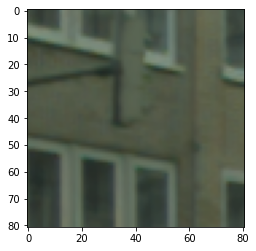

In [35]:
main()

### validate data

val :  (582, 81, 81, 3) 0/1 split 50.0 %
train :  (3316, 81, 81, 3) 0/1 split 50.0 %


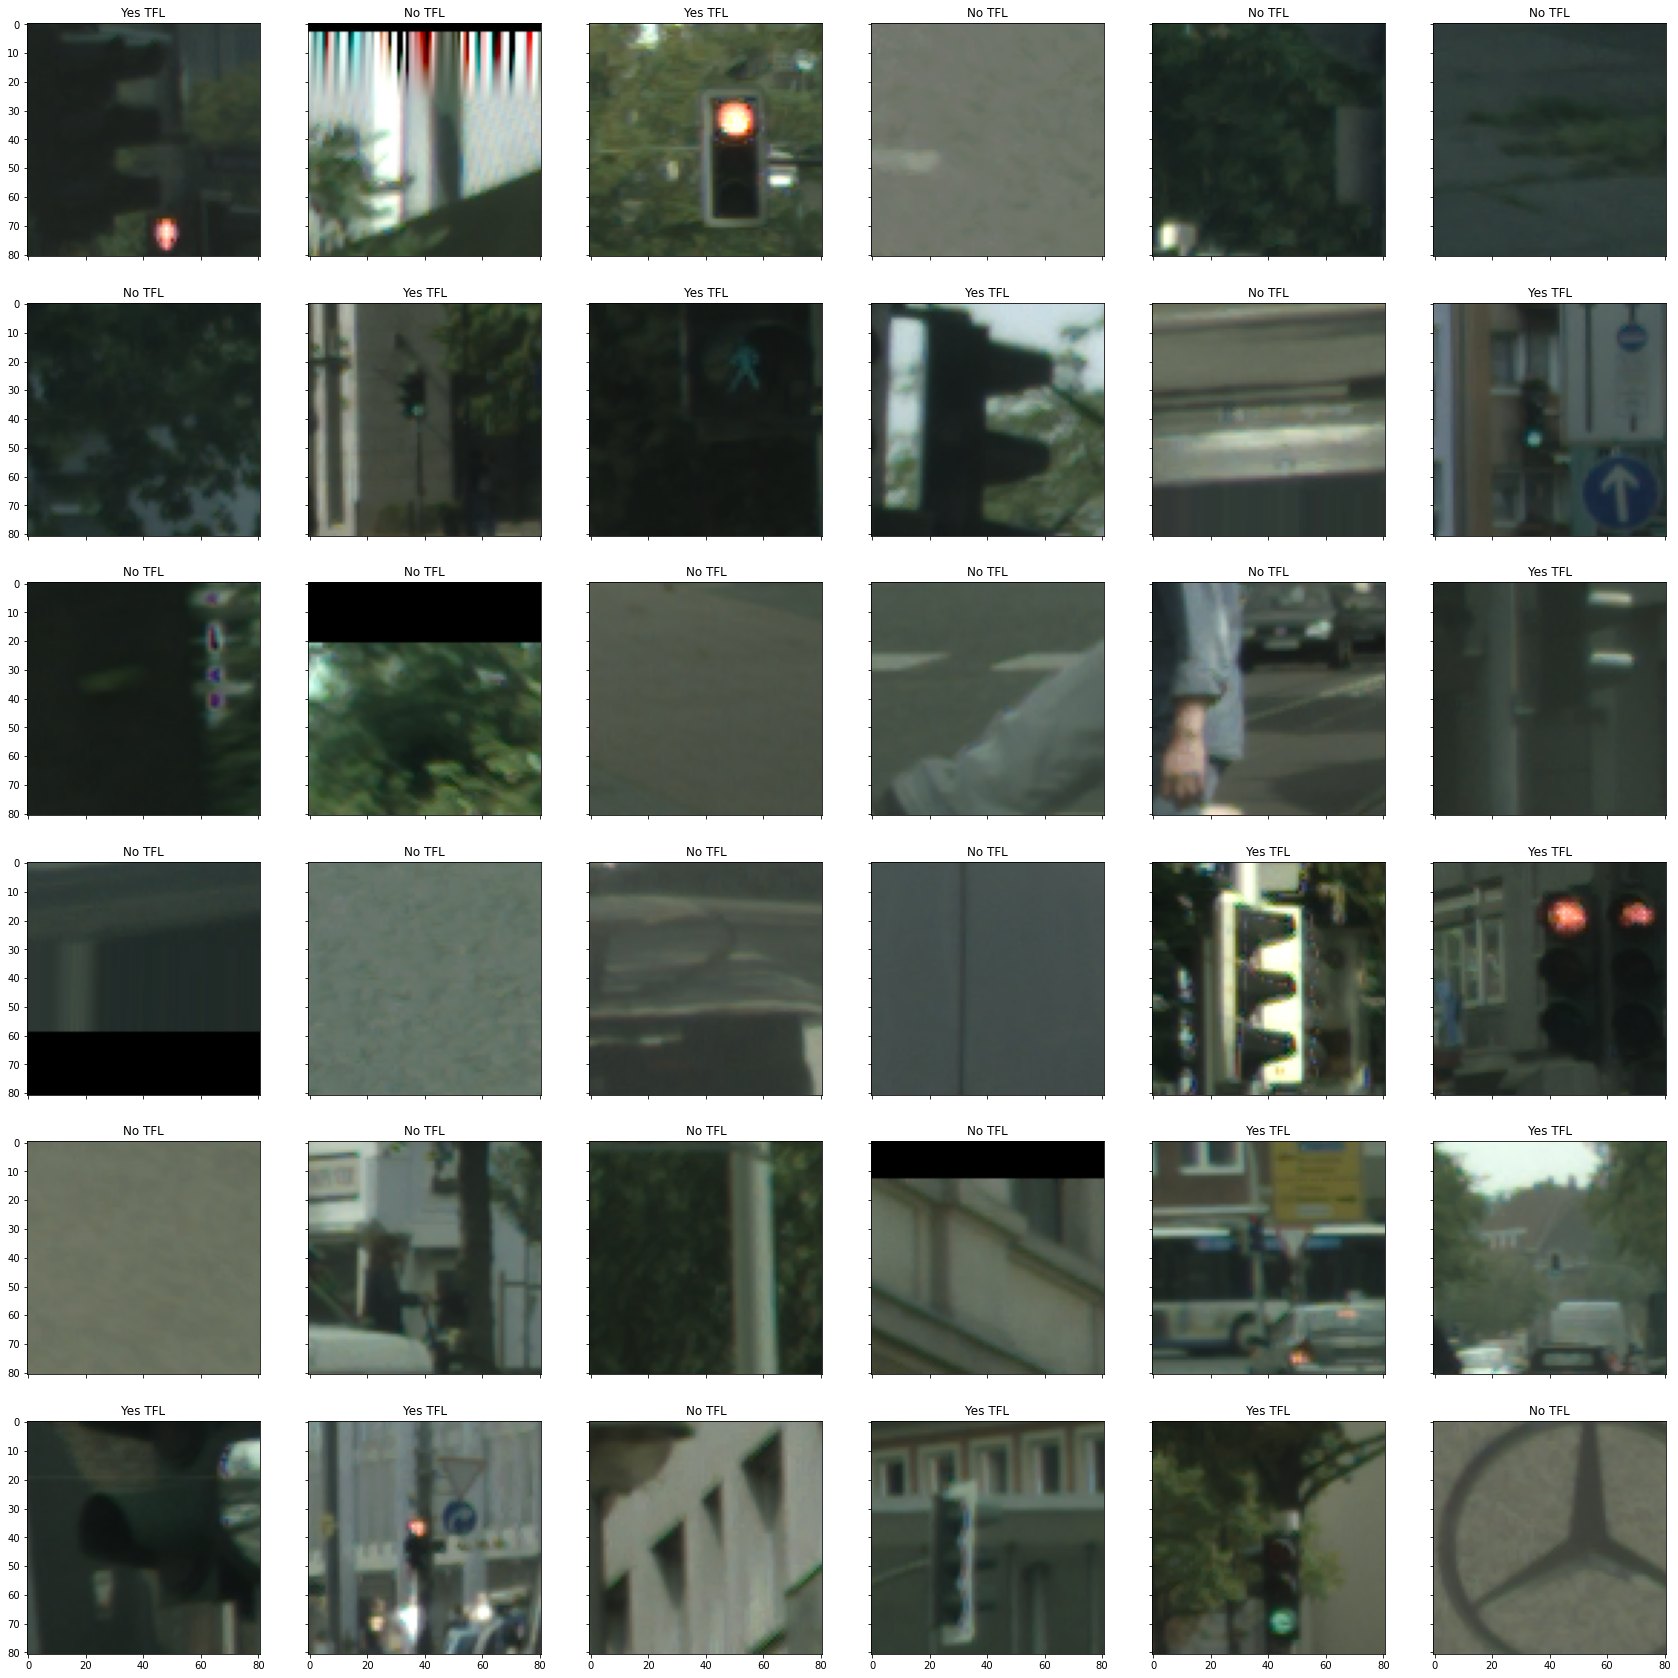

In [14]:
def load_tfl_data(data_dir, crop_shape=(81,81)):
    images = np.memmap(join(data_dir,'data.bin'),mode='r',dtype=np.uint8).reshape([-1]+list(crop_shape) +[3])
    labels = np.memmap(join(data_dir,'labels.bin'),mode='r',dtype=np.uint8)
    return {'images':images,'labels':labels}

def viz_my_data(images,labels, predictions=None, num=(5,5), labels2name= {0:'No TFL',1:'Yes TFL'}):
    assert images.shape[0] == labels.shape[0]
    assert predictions is None or predictions.shape[0] == images.shape[0]
    h= 5
    n = num[0]*num[1]
    ax = plt.subplots(num[0],num[1],figsize=(h*num[0],h*num[1]),gridspec_kw={'wspace':0.05},squeeze=False,sharex=True,sharey=True)[1]#.flatten()
    idxs = np.random.randint(0,images.shape[0],n)
    for i,idx in enumerate(idxs):
        ax.flatten()[i].imshow(images[idx])
        title = labels2name[labels[idx]]
        if predictions is not None : title += ' Prediction: {}'.format(labels2name[predictions[idx]])
        ax.flatten()[i].set_title(title)
    

root = r'C:\Users\rochela\Documents\school\bootcamp\projects\mobileye_project\data_lib'
datasets = {
    'val':load_tfl_data(join(root,'val')),
    'train': load_tfl_data(join(root,'train')),
    }
for k,v in datasets.items():
    
    print ('{} :  {} 0/1 split {:.1f} %'.format(k,v['images'].shape, np.mean(v['labels']==1)*100))

viz_my_data(num=(6,6),**datasets['val'])  

In [34]:
with open("file.bin", "wb") as f: # or choose 'w+' mode - read "open()" documentation
    for i in range(1000):
        alist.append(i)
        if i == (c*100):
            np.array(alist).tofile(f)

crop_shape=(81,81)
with open(r'C:\Users\rochela\Documents\school\bootcamp\projects\mobileye_project\data_lib\train\labels.bin', 'r+b') as f:
#     images = np.memmap(r'C:\Users\rochela\Documents\school\bootcamp\projects\mobileye_project\data_lib2\train\data.bin',mode='r',dtype=np.uint8).reshape([-1]+list(crop_shape) +[3])
    labels = np.memmap(r'C:\Users\rochela\Documents\school\bootcamp\projects\mobileye_project\data_lib2\train\labels.bin',mode='r',dtype=np.uint8)
    for i in range(len(labels)):
        print(i)
        np.array(labels[i]).tofile(f)


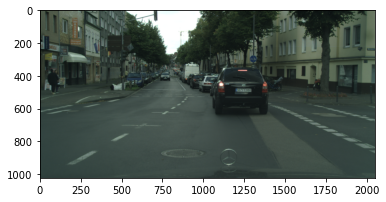

In [19]:
root = r'C:\Users\rochela\Documents\school\bootcamp\projects\mobileye_project\leftImg8bit_trainvaltest\leftImg8bit\train\cologne'
img = plt.imread(join(root, 'cologne_000001_000019_leftImg8bit.png'))
plt.imshow(img)
# # plt.imshow(img[100:389, 100:389])
# # cologne_000007_000019_leftImg8bit
img = img[:289, 1200:1489]
crop_shape=(81,81)
with open(r'C:\Users\rochela\Documents\school\bootcamp\projects\mobileye_project\data_lib\train\labels.bin', 'r+b') as f:
# # #     images = np.memmap(r'C:\Users\rochela\Documents\school\bootcamp\projects\mobileye_project\data_lib2\train\data.bin',mode='r',dtype=np.uint8).reshape([-1]+list(crop_shape) +[3])
# #     labels = np.memmap(r'C:\Users\rochela\Documents\school\bootcamp\projects\mobileye_project\data_lib2\train\labels.bin',mode='r',dtype=np.uint8)
# #     for i in range(len(labels)):
# #         print(i)
    for i in range(5):
        np.array(0).tofile(f)
        
